# Taller_SVM_NN

### Neural Networks

Utilizando la base de datos Digits de sklearn, construir una red neuronal para clasificacion, que permita
identificar diferentes tipos de dıgtos.

1) La base de datos a utilizar se encuentra en el modulo from sklearn.datasets import load digits

In [4]:
#Import the all libraries for the notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy.matlib as mat
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits

2) Investigue y utilice la funcion train test split para realizar la particion de la base de datos entre los
conjuntos de Train y Test

#### Train test split
In scikit-learn a random split into training and test sets can be quickly computed with the train_test_split helper function.

In [6]:
from sklearn.model_selection import train_test_split

(1797L, 64L)


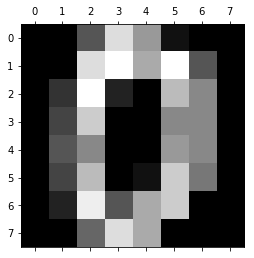

In [7]:
digits = load_digits()
print(digits.data.shape)
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

caracteristicas = digits.data
etiquetas = digits.target

Xtrain, xtest, Ytrain, ytest = train_test_split(caracteristicas,etiquetas)

3) Realice diferentes pruebas de configuracion de la red neuronal, con el fin de encontrar el mejor conjunto
de parametros que realiza el reconocimiento (#-Capas, #-Neuronas por capa).

### red_digits

Al entrenar nuestra red neuronal con scikit-learn nos encontramos una gran variedad de parametros que nos permiten modelar y tener un mejor control sobre nuestros datos analisar, los parametros que se usaron para el entrenamiento de "red_digits" son unos valores estandar los cuales sólo modificaremos los más relevantes para poder encontrar un ajuste de Overfitting/Underfitting en nuestro modelo.

In [41]:
red_digits = MLPClassifier(hidden_layer_sizes=(20), activation="relu",
                 solver='sgd', alpha=0.0001,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init=0.001, power_t=0.5, max_iter=200,
                 shuffle=True, random_state=None, tol=1e-4,
                 verbose=False, warm_start=False, momentum=0.9,
                 nesterovs_momentum=True, early_stopping=False,
                 validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                 epsilon=1e-8)

red_digits.fit(Xtrain,Ytrain)

print("La medida de desempeño es: " )
red_digits.score(xtest,ytest)

La medida de desempeño es: 


0.9222222222222223

Al cambiar de valores un conjunto de parametros que me puedan dar el reconocimiento (#-Capas, #-Neuronas por capa), encontramos: 

-La propia herramienta scikit-learn nos orienta a un punto de convergencia en la optimización de nuestros datos

-La optimización estocastica va muy ligada del número de iteraciones máximas que utilicemos para entrenar la red.

-Al rededor de un 0.92% o un % menor con los datos de test no tenemos una buena convergencia de la optimización.

-Cambiando el número de capas ocultas y de iteraciones podemos encontrar una optimización estocastica queconverga para nuestra red neuronal.

-El solver 'sgd' nos permite optimizar los pesos de nuestra red neuronal "red_digits" en base al gradiente descendiente 

-Tolerancia para la optimización. Cuando la pérdida o el puntaje no mejora al menos el valor de 'tol' durante dos iteraciones consecutivas, a menos que learning_rate se configure como 'adaptativo', se considera que se ha alcanzado la convergencia y se detiene el entrenamiento.



4) reporte la matriz de confucion y el accuracy del modelo para las diferentes configuraciones de las redes
encontradas.

In [27]:
y_pred = red_digits.predict(caracteristicas)
print y_pred
from sklearn.metrics import confusion_matrix
cMat = confusion_matrix(etiquetas, y_pred)

[0 1 2 ... 8 9 8]


In [30]:
cMat.view()

array([[176,   0,   0,   0,   1,   1,   0,   0,   0,   0],
       [  0, 180,   0,   0,   0,   1,   1,   0,   0,   0],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 181,   0,   1,   0,   0,   1,   0],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0, 180,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0, 180,   0,   1,   0],
       [  0,   0,   0,   0,   0,   2,   0, 177,   0,   0],
       [  0,   5,   0,   0,   0,   2,   0,   1, 165,   1],
       [  0,   0,   0,   0,   0,   2,   0,   2,   3, 173]], dtype=int64)

Medidas de desempeño en la redes encontradas:

    -0.9466666666666667
    -0.9511111111111111
    -0.9355555555555556
    -0.9333333333333333
    -0.9222222222222223